In [4]:
import aerosandbox as asb
import aerosandbox.numpy as np

In [5]:
def f(x):
    return x * np.floor(x + 0.5) + 0.1 * x ** 2

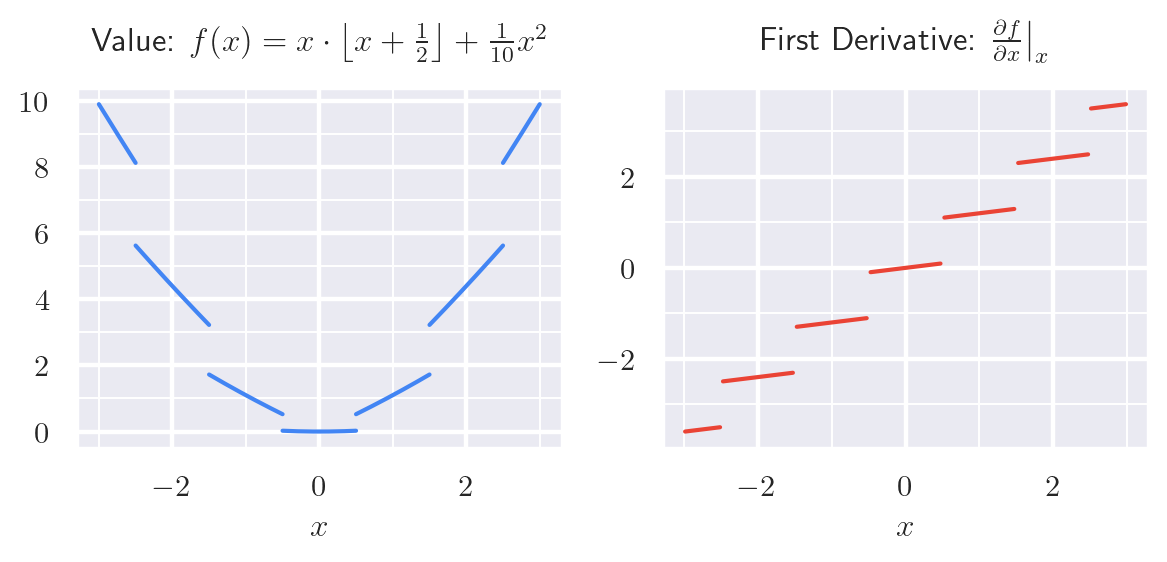

In [10]:
from aerosandbox.tools.pretty_plots import plt, sns, mpl, show_plot, palettes

xmin = -3
xmax = 3

xrng = np.concatenate([
    np.array([xmin]),
    np.arange(xmin + 0.5, xmax + 0.5),
    np.array([xmax])
])

eps = 1e-6

xlist = []
for left, right in zip(xrng[:-1], xrng[1:]):
    xlist.extend([
        np.linspace(left + eps, right - eps, 20),
        np.array([np.nan]),
    ])
xs = np.concatenate(xlist)

fig, ax = plt.subplots(1, 2, figsize=(6, 3))
ytitle = 1.06

mpl.rc('text', usetex=True)
mpl.rc('text.latex',
    preamble=r"\usepackage{amsmath}"
)

from matplotlib.ticker import MultipleLocator

plt.sca(ax[0])
plt.plot(xs, f(xs))
plt.title(r"Value: $f(x) = x \cdot \big\lfloor x + \frac{1}{2} \big\rfloor + \frac{1}{10} x^2$", y=ytitle)
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
plt.gca().yaxis.set_major_locator(MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(MultipleLocator(1))


plt.sca(ax[1])
plt.plot(
    (xs[1:] + xs[:-1]) / 2,
    np.diff(f(xs)) / np.diff(xs),
    color=palettes["categorical"][1]
)
plt.title(r"First Derivative: $\frac{\partial f}{\partial x} \big|_x$", y=ytitle)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
plt.gca().yaxis.set_minor_locator(MultipleLocator(1))

for a in ax:
    a.set_xlabel(r"$x$")

show_plot(
    show=False,
    tight_layout=True
)
# plt.savefig(r"C:\Users\User\Dropbox (MIT)\School\Grad School\2021 Spring\Thesis\TeX\figures\nondiff.pgf")
plt.show()

In [8]:
opti = asb.Opti()

x = opti.variable(init_guess=10.5)

opti.minimize(f(x))

sol = opti.solve()

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        1
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1